
ANÁLISE EXPLORATÓRIA DOS DADOS DA TABELA CHURN


In [3]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [4]:
#lendo dataset
dataset = pd.read_csv("Churn.csv", sep=';')

In [5]:
#Os dados apresentam erros, vamos efetuar correções
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
#Renomeando colunas
dataset.columns = ["Id","Score","Estado","Gênero","Idade","Patrimonio","Saldo",
                   "Produtos","TemCartãoCredito","Ativo","Salario","Saiu"]

In [7]:
#explorando dados categóricos

#Estado
#Precisa de Correções, pois os dados correspondem somente à 
#região sul então 'RP','TD' e 'SP' são erros 
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Estado'>

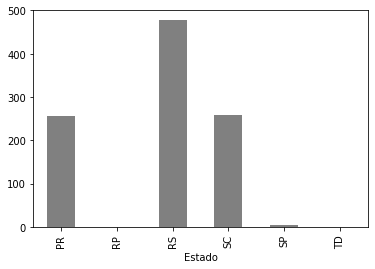

In [8]:
#visualização gráfica estado
agrupado.plot.bar(color='gray')

In [9]:
#Gênero
#Precisa de Correção pois os dados estão fora de um padrão
#F, Fem e Feminino representam a mesma coisa, o mesmo para M e Masculino
agrupado = dataset.groupby(["Gênero"]).size()
agrupado

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='Gênero'>

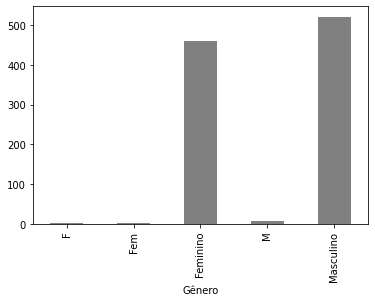

In [10]:
#visualização gráfica Gênero
agrupado.plot.bar(color= 'gray')

In [11]:
#Analisando colunas numéricas
#score
#nada anormal
dataset["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

C:\Users\Reinoso\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Score')

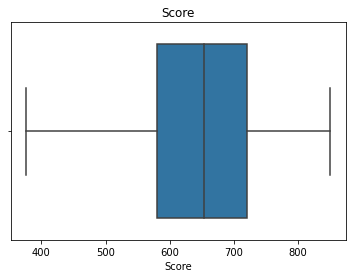

In [12]:
#analise gráfica 
srn.boxplot(dataset["Score"]).set_title("Score")

C:\Users\Reinoso\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Score')

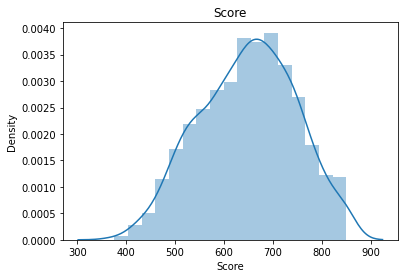

In [13]:
srn.distplot(dataset["Score"]).set_title("Score")

In [14]:
#Idade
#Correção necessária, contém idade negativa e idade maior que 120, 
#isso não corresponde aos padrões de idade humanas
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

C:\Users\Reinoso\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Idade')

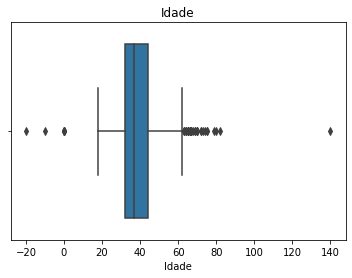

In [15]:
#análise gráfica idade
srn.boxplot(dataset["Idade"]).set_title("Idade")

C:\Users\Reinoso\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

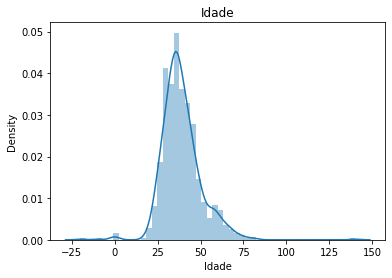

In [16]:
srn.distplot(dataset["Idade"]).set_title("Idade")

In [17]:
#saldo
#nada anormal
dataset["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

C:\Users\Reinoso\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Saldo')

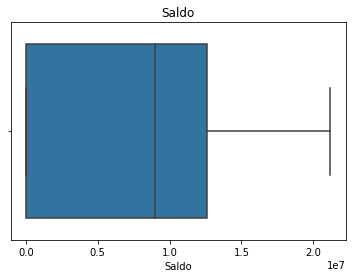

In [18]:
srn.boxplot(dataset["Saldo"]).set_title("Saldo")

C:\Users\Reinoso\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Saldo')

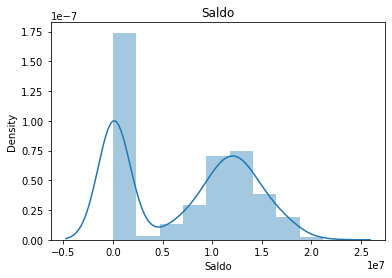

In [19]:
srn.distplot(dataset["Saldo"]).set_title("Saldo")

In [20]:
#Salario
#outliers (valores que fogem do padrão e podem afetar as análises) precisam ser substituidos
dataset["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

C:\Users\Reinoso\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Salario')

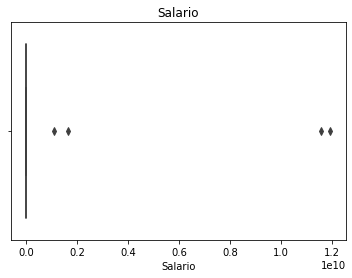

In [21]:
srn.boxplot(dataset["Salario"]).set_title("Salario")

C:\Users\Reinoso\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salario')

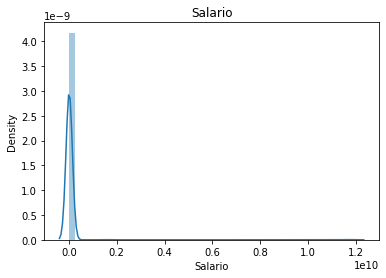

In [22]:
srn.distplot(dataset["Salario"]).set_title("Salario")

In [23]:
#Verificando valores NaN
#8 NaN em Estado e 7 Nan em Salario
dataset.isnull().sum()

Id                  0
Score               0
Estado              0
Gênero              8
Idade               0
Patrimonio          0
Saldo               0
Produtos            0
TemCartãoCredito    0
Ativo               0
Salario             7
Saiu                0
dtype: int64

In [42]:
#verificando elementos duplicados a partir do Id
#tem elementos duplicados que precisam de correção
dataset[dataset.duplicated(["Id"],keep=False)]

,Id,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartãoCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [24]:
dataset.head()

,Id,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartãoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


TRATANDO OS DADOS

In [25]:
#Nessa etapa vamos corrigir os problemas encontrados na etapa 1, fazendo alterações reias na variável dataset

#para começar vamos substituir os valores NaN (vazios)

#NaN de salario
#calculando a mediana para substituir os NaN por ela
mediana = sts.median(dataset["Salario"])
mediana


70518.0

In [27]:
#substituindo NaN por mediana
dataset["Salario"].fillna(mediana,inplace=True)

In [28]:
#verificando se ainda tem NaN Salario
dataset["Salario"].isnull().sum()

0

In [30]:
#Gênero
#Preenchendo NaN de Gênero por "Masculino" porquê é a moda
dataset["Gênero"].fillna("Masculino",inplace=True)

In [31]:
#verificando se ainda tem NaN em Gênero
dataset["Gênero"].isnull().sum()

0

In [33]:
#O segundo problema que tinhamos em gênero era a despadronização
#substituindo valores 'M' por 'Masculino'
dataset.loc[dataset["Gênero"] == 'M',"Gênero"] = "Masculino"

#substituindo valores 'F' e 'Fem' por "Feminino"
dataset.loc[dataset["Gênero"].isin(['F','Fem']), "Gênero"] = "Feminino"

#verificando se os valores 'M', 'F' e 'Fem' foram substituidos
dataset.groupby(["Gênero"]).size()

Gênero
Feminino     464
Masculino    535
dtype: int64

In [36]:
#Idade
#O problema que encontramos em idade foram valores menores que 0 e maiores que 120
#vamos fazer a substituição desses valores pela mediana

#calculando mediana
mediana = sts.median(dataset["Idade"])
mediana



37

In [40]:
#substituindo valores errados pela mediana
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120), "Idade"] =  mediana

In [41]:
#verificando se ainda tem valores errados (fora do dominio)
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120), "Idade"].sum()

0

In [43]:
#outro problema encontrado foram os elementos duplicados em Id, vamos excluílos e deixar apenas 1

#excluindo duplicados
dataset.drop_duplicates(subset="Id", keep= "first", inplace= True)

#verificando se ainda tem duplicados
dataset[dataset.duplicated(["Id"], keep= False)]

,Id,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartãoCredito,Ativo,Salario,Saiu


In [44]:
#Estado
#Os problemas encontrados em estado foram os valores fora do domínio 'RP', 'SP' e 'TD'
#vamos fazer a substituição deles pela moda (RS)
dataset.loc[dataset["Estado"].isin(['RP','SP','TD']), "Estado"] = "RS"

#verificando se ainda tem valores fora do dominio
dataset.groupby(["Estado"]).size()

Estado
PR    257
RS    483
SC    258
dtype: int64

In [46]:
#Salario
#O problema encontrado em salário foram os outliers
#vamos substituir os outliers pela mediana

#calculando desvio padrão
desv = sts.stdev(dataset["Salario"])
desv

528988918.4679201

In [48]:
#calculando a mediana
mediana = sts.median(dataset["Salario"])
mediana

8637195.5

In [49]:
#subistituindo valores de 2 desvios padrão pela mediana
dataset.loc[dataset["Salario"] >= 2 * desv, "Salario"] = mediana

In [53]:
#verificando se ainda tem outliers
dataset[dataset["Salario"] >= 2 * desv]

,Id,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartãoCredito,Ativo,Salario,Saiu


In [ ]:
#Fizemos todos os tratamentos necessários, parabéns
#Não esqueça de verificar o Exemplo2 também!